In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
## MAlaria Detection using Transfer Learning

# Download The Dataset from 
#https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [3]:
#Let's unzip the out dataset
import os

#give your directory path here in which you want to save your unzip file
os.chdir('/content/gdrive/My Drive/data science/kaggle_project/malaria_detection/cell_data')

#give your path of zip file below here
!unzip '/content/gdrive/My Drive/data science/kaggle_project/malaria_detection/cell_data_ordered.zip'

Streaming output truncated to the last 5000 lines.
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134209_cell_43.png  
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134209_cell_73.png  
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134209_cell_83.png  
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134209_cell_9.png  
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134209_cell_99.png  
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134229_cell_102.png  
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134229_cell_110.png  
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134229_cell_141.png  
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134229_cell_16.png  
 extracting: cell_data_ordered/Train/Uninfected/C188P149ThinF_IMG_20151203_134229_c

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

In [32]:
#from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob #Python, the glob module is used to retrieve files/pathnames matching a specified pattern
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [7]:
train_path = '/content/gdrive/My Drive/data science/kaggle_project/malaria_detection/cell_data/cell_data_ordered/Train'
valid_path = '/content/gdrive/My Drive/data science/kaggle_project/malaria_detection/cell_data/cell_data_ordered/Test'

In [8]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 
#include_top: whether to include the 3 fully-connected layers at the top of the network


80142336/80134624 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [10]:
# now we want to find out the the number of classes so we will use the 'glob' function for that
folders = glob('/content/gdrive/My Drive/data science/kaggle_project/malaria_detection/cell_data/cell_data_ordered/Train/*')

In [11]:
#lets let's flatten the final convolutional layes or vgg-19 output
x = Flatten()(vgg.output)
#lets add the final output neural networks there will be 2 perceptron on the end because we have 2 catagories
prediction = Dense(len(folders), activation='softmax')(x)


In [12]:
print(len(folders))

2


In [13]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
# view the structure of the model
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [27]:
#we don't need to do data_augmentation for test data

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 22058 images belonging to 2 classes.


In [28]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5500 images belonging to 2 classes.


In [29]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
690/690 [==============================] - 317s 459ms/step - loss: 0.2345 - accuracy: 0.9143 - val_loss: 0.3088 - val_accuracy: 0.8918
Epoch 2/5
690/690 [==============================] - 314s 456ms/step - loss: 0.2402 - accuracy: 0.9141 - val_loss: 0.5640 - val_accuracy: 0.8422
Epoch 3/5
690/690 [==============================] - 307s 445ms/step - loss: 0.2313 - accuracy: 0.9198 - val_loss: 0.3860 - val_accuracy: 0.8816
Epoch 4/5
690/690 [==============================] - 307s 444ms/step - loss: 0.2286 - accuracy: 0.9193 - val_loss: 0.4642 - val_accuracy: 0.8658
Epoch 5/5
690/690 [==============================] - 302s 438ms/step - loss: 0.2126 - accuracy: 0.9269 - val_loss: 0.3445 - val_accuracy: 0.8885


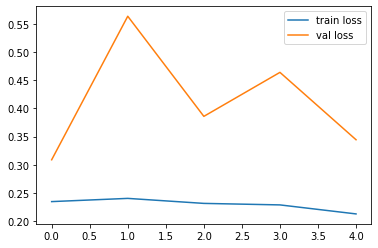

<Figure size 432x288 with 0 Axes>

In [30]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

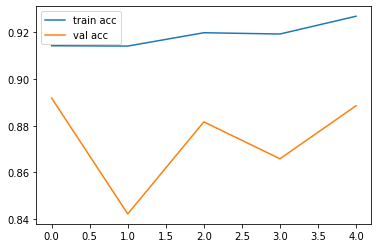

<Figure size 432x288 with 0 Axes>

In [35]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
import tensorflow as tf

from keras.models import load_model

In [37]:
model.save('model_vgg19.h5')